In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import sys, os, importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import miptlabs as ml
importlib.reload(ml)

importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [4]:
data = pd.read_csv('1.1-1.3.csv')
display(data)

,x_m-,y_m-,x_m+,y_m+,K_x,K_y,V,x_m+.1,y_m+.1,K_x.1,K_y.1,V.1
0,-2.0,-1.8,2.2,1.6,1.00,5.00,102.0,4.0,3.0,20.0,500.0,20.0
1,-2.0,-1.8,2.2,1.6,1.00,5.00,90.5,3.0,2.7,20.0,500.0,18.0
2,-1.8,-1.8,2.1,1.6,1.00,5.00,80.0,4.8,2.5,10.0,500.0,16.0
3,-1.7,-1.8,2.0,1.6,1.00,5.00,70.0,4.0,2.2,10.0,500.0,14.0
4,-1.6,-1.8,1.8,1.6,1.00,5.00,60.0,3.4,1.9,10.0,500.0,12.0
5,-2.8,-1.8,3.0,1.6,0.50,5.00,50.5,2.6,4.0,10.0,200.0,10.0
6,-2.4,-1.8,2.4,1.2,0.50,5.00,40.0,4.3,3.2,5.0,200.0,8.0
7,-4.0,-2.0,5.0,1.4,0.20,2.00,30.0,3.4,2.4,5.0,200.0,6.0
8,-2.6,-2.8,3.4,2.0,0.20,0.10,20.5,2.3,3.2,5.0,100.0,4.0
9,-2.8,-1.4,3.4,1.4,0.20,0.02,10.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# пункт 19
54.8
(-1.4, -1.8)
(1.8, 1.5)++++++++

SyntaxError: invalid syntax (<ipython-input-4-7756d096bd6f>, line 4)

In [5]:
#Ферромагнетик
df2 = pd.DataFrame()
df2['x_m+'] = ml.get_column(data, 'x_m+.1', lambda row: ml.PQ(row['x_m+.1']*row['K_x.1']*u.V, sigma=0.2*row['K_x.1']*u.V))
df2['y_m+'] = ml.get_column(data, 'y_m+.1', lambda row: ml.PQ(row['y_m+.1']*row['K_y.1']*u.V, sigma=0.2*row['K_y.1']*u.V))
#df1['V'] = ml.get_column(data, 'x_m-', lambda row: ml.PQ(row['x_m-']*row['K_x'], sigma=0.2))
display(df2)

,x_m+,y_m+
0,80±4 V (5.0%),1500±100 V (6.7%)
1,60±4 V (6.7%),1350±100 V (7.4%)
2,48.0±2.0 V (4.2%),1250±100 V (8.0%)
3,40.0±2.0 V (5.0%),1100±100 V (9.1%)
4,34.0±2.0 V (5.9%),950±100 V (11%)
5,26.0±2.0 V (7.7%),800±40 V (5.0%)
6,21.5±1.0 V (4.7%),640±40 V (6.2%)
7,17.0±1.0 V (5.9%),480±40 V (8.3%)
8,11.5±1.0 V (8.7%),320±20 V (6.2%)


B_r (-1.9±0.5)*10^-6 F*V*ohm/cm**2 (-26%)
H_c 10.5±2.4 V/(cm*ohm) (23%)


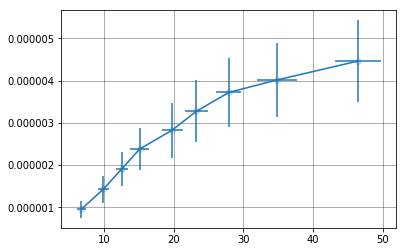

In [30]:
N_1 = 100
N_2 = 200
R_1 = ml.PQ(51*u.ohm, epsilon=0.05)
R_2 = ml.PQ(4.3*1e3*u.ohm, epsilon=0.05)
C = ml.PQ(0.22*1e-6*u.farad, epsilon=0.2).repr_as(u.farad)
d = ml.PQ(5*u.mm, is_const=True)
d_1 = ml.PQ(18*u.mm, is_const=True)
d_2 = ml.PQ(9*u.mm, is_const=True)
r_1 = d_1/2
r_2 = d_2/2
r_t = ((r_1+r_2)/2).repr_as(u.cm)
S = (np.pi*((r_1-r_2)/2)**2).repr_as(u.cm**2)

H_mult = 1e-1*(2*N_1)/(r_t*R_1)
df2['H'] = df2['x_m+']*H_mult
B_mult=1e2*(R_2*C*1e-6)/(N_2*S)
df2['B'] = df2['y_m+']*B_mult

x_c = -0.9
y_r = 1.3
U_r=ml.PQ(-y_r*data['K_y.1'][0]*u.volt, sigma=0.2*data['K_y.1'][0]*u.volt)
B_r=U_r*B_mult
U_c=ml.PQ(-x_c*data['K_x.1'][0]*u.volt, sigma=0.2*data['K_x.1'][0]*u.volt)
H_c=U_c*H_mult

print('B_r', B_r)
print('H_c', H_c)

ml.plt_pq(df2['H'], df2['B'])

In [25]:
# Сегнетоэлектрик
df1 = pd.DataFrame()
df1['x_m-'] = ml.get_column(data, 'x_m-', lambda row: ml.PQ(row['x_m-']*row['K_x']*u.V, sigma=0.2*row['K_x']*u.V))
df1['y_m-'] = ml.get_column(data, 'y_m-', lambda row: ml.PQ(row['y_m-']*row['K_y']*u.V, sigma=0.2*row['K_y']*u.V))
df1['x_m+'] = ml.get_column(data, 'x_m+', lambda row: ml.PQ(row['x_m+']*row['K_x']*u.V, sigma=0.2*row['K_x']*u.V))
df1['y_m+'] = ml.get_column(data, 'y_m+', lambda row: ml.PQ(row['y_m+']*row['K_y']*u.V, sigma=0.2*row['K_y']*u.V))
df1['V'] = ml.get_column(data, 'V', lambda row: ml.PQ(row['V']*u.V, sigma=0.5*u.V))
df1 = df1.sort_values(by=['V'], ascending=False)
display(df1)

,x_m-,y_m-,x_m+,y_m+,V
0,-2.00±0.20 V (-10%),-9.0±1.0 V (-11%),2.20±0.20 V (9.1%),8.0±1.0 V (12%),102.0±0.5 V (0.49%)
1,-2.00±0.20 V (-10%),-9.0±1.0 V (-11%),2.20±0.20 V (9.1%),8.0±1.0 V (12%),90.5±0.5 V (0.55%)
2,-1.80±0.20 V (-11%),-9.0±1.0 V (-11%),2.10±0.20 V (9.5%),8.0±1.0 V (12%),80.0±0.5 V (0.62%)
3,-1.70±0.20 V (-12%),-9.0±1.0 V (-11%),2.00±0.20 V (10%),8.0±1.0 V (12%),70.0±0.5 V (0.71%)
4,-1.60±0.20 V (-12%),-9.0±1.0 V (-11%),1.80±0.20 V (11%),8.0±1.0 V (12%),60.0±0.5 V (0.83%)
12,-1.50±0.10 V (-6.7%),-9.0±1.0 V (-11%),1.70±0.10 V (5.9%),7.5±1.0 V (13%),55.0±0.5 V (0.91%)
5,-1.40±0.10 V (-7.1%),-9.0±1.0 V (-11%),1.50±0.10 V (6.7%),8.0±1.0 V (12%),50.5±0.5 V (0.99%)
11,-1.30±0.10 V (-7.7%),-9.0±1.0 V (-11%),1.40±0.10 V (7.1%),7.0±1.0 V (14%),45.0±0.5 V (1.1%)
6,-1.20±0.10 V (-8.3%),-9.0±1.0 V (-11%),1.20±0.10 V (8.3%),6.0±1.0 V (17%),40.0±0.5 V (1.2%)
7,-0.80±0.04 V (-5.0%),-4.0±0.4 V (-10%),1.00±0.04 V (4.0%),2.8±0.4 V (14%),30.0±0.5 V (1.7%)


(8.4±0.9)*10^-9 F/cm**2 (11%)
0.047±0.005 1/cm (10%)
D_r (12.70±1.40)*10^-9 F/cm**2 (11%)
E_c 0.052±0.005 1/cm (10%)


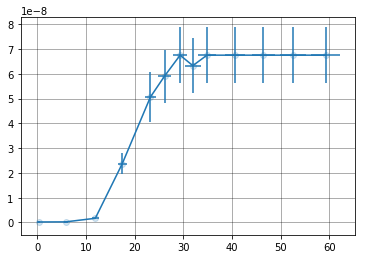

In [29]:
h_1 = ml.PQ(1.0*u.mm, sigma=0.1*u.mm).repr_as(u.cm)
S = ml.PQ(6*3.5*u.mm**2, sigma=1.0*u.mm**2).repr_as(u.cm**2)
C_2 = ml.PQ(0.047*1e-6*u.farad, epsilon=0.1)
R_1 = ml.PQ(470*1e3*u.ohm, epsilon=0.05)
R_2 = ml.PQ(11*1e3*u.ohm, epsilon=0.05)

D_mult=12*np.pi*1e3*C_2*1e-6/S
print(D_mult)
df1['D'] = df1['y_m+']*D_mult
E_mult=np.sqrt(2)/(300*h_1)
print(E_mult)
df1['E'] = df1['V']*H_mult

y_r = 1.5
#y_r = -1.6
x_c = -1.1
#y_c = 1.3
D_r = y_r*D_mult
print('D_r', D_r)
E_c = -x_c*E_mult
print('E_c', E_c)


ml.plt_pq(df1['E'], df1['D'])